In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.wine.Wine_Quality_Data import get_wine_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
from sklearn import tree
import matplotlib.pyplot as plt

PLOT_PREFIX = "Figures/DECISION_TREE_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/WINE_DECISION_TREE"

In [2]:
# Load Data
import DecisionTrees.common_decision_tree as common_decision_tree
X_train, X_test, y_train, y_test = get_wine_dataset()
num_features = X_train.shape[1]
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2043 non-null   float64
 1   volatile acidity      2043 non-null   float64
 2   citric acid           2043 non-null   float64
 3   residual sugar        2043 non-null   float64
 4   chlorides             2043 non-null   float64
 5   free sulfur dioxide   2043 non-null   float64
 6   total sulfur dioxide  2043 non-null   float64
 7   density               2043 non-null   float64
 8   pH                    2043 non-null   float64
 9   sulphates             2043 non-null   float64
 10  alcohol               2043 non-null   float64
dtypes: float64(11)
memory usage: 175.7 KB
None


In [3]:
# Start with Learning Curve on Default Classifier
import TrainingCurves
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(criterion='entropy'), X_train, y_train, "accuracy")

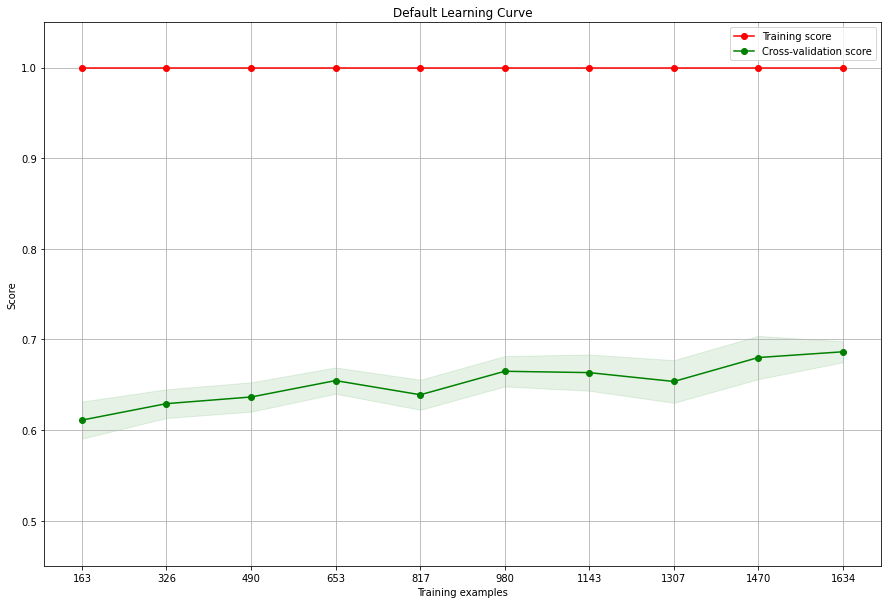

In [4]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


In [5]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)
criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 50, 2)]
num_features = X_train.shape[1]
max_features = [i for i in range(num_features+1)]

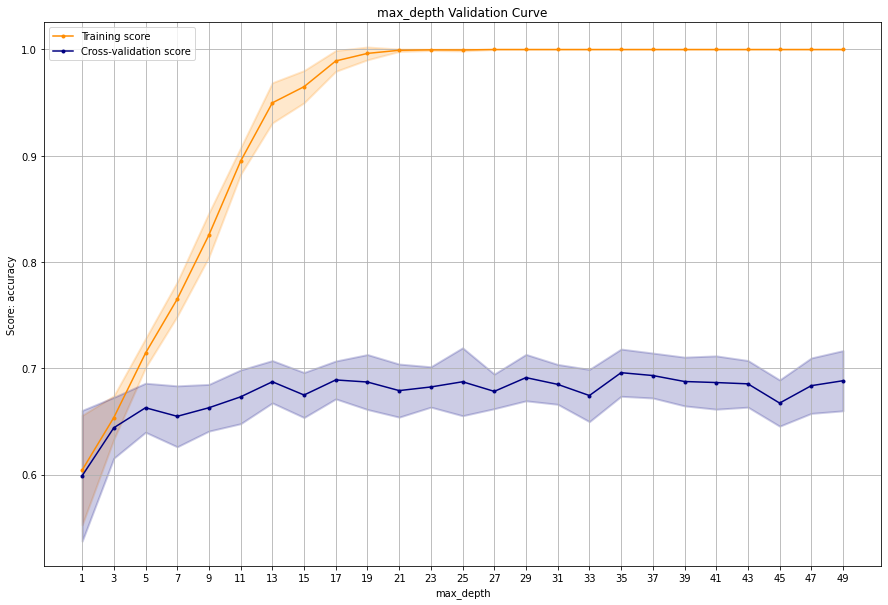

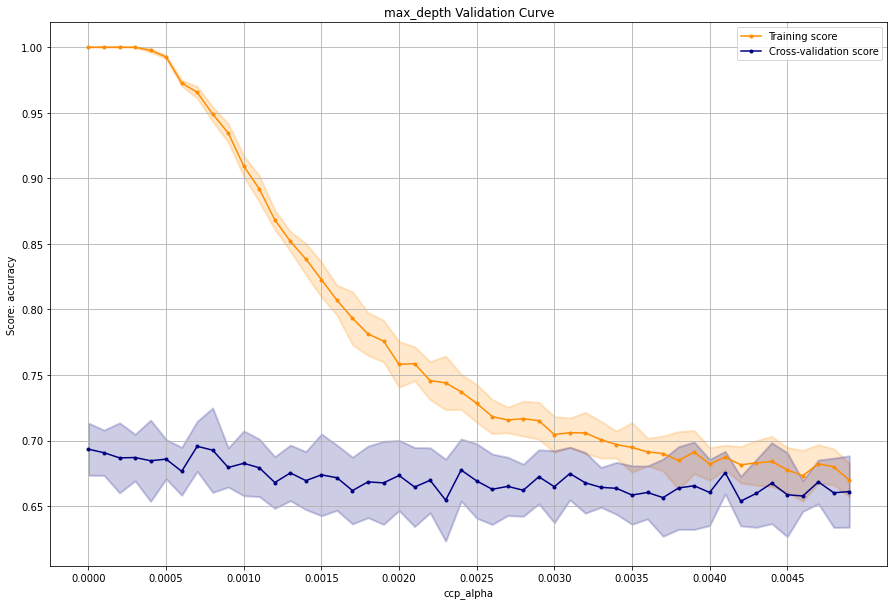

In [6]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_features=3), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_features=3), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=5)


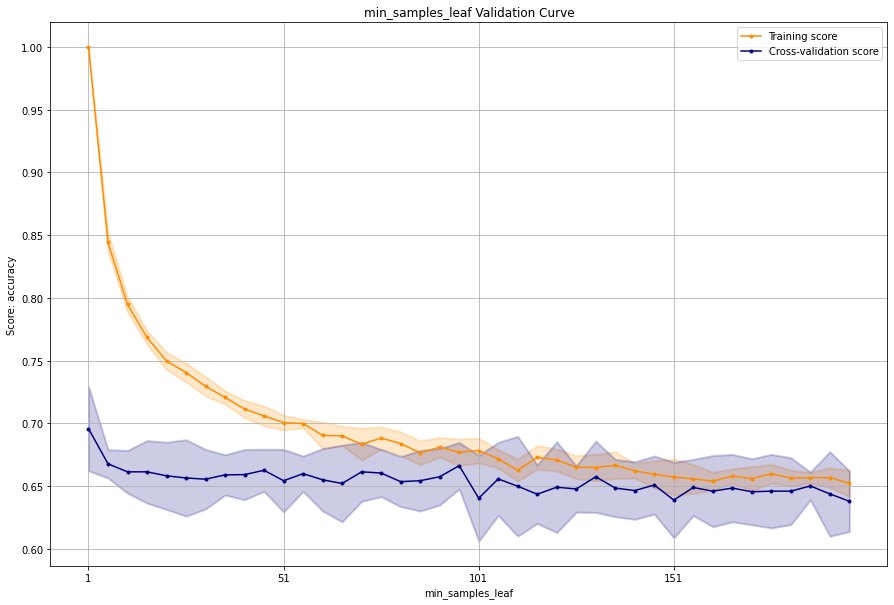

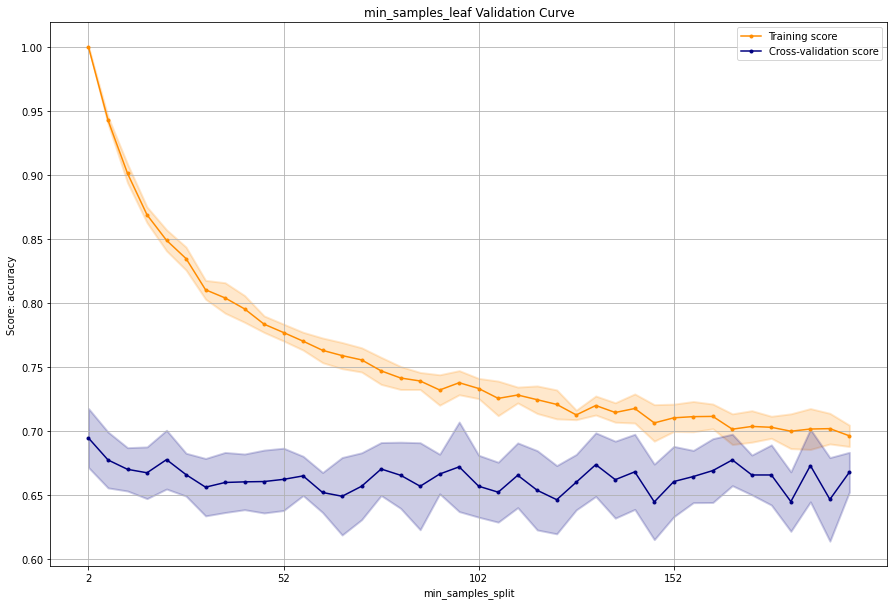

In [7]:
test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 100, 'ccp_alpha': 0.0001}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_leaf", min_samples_leaf, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_leaf", min_samples_leaf, title="min_samples_leaf Validation Curve", scoring="accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_split", min_samples_split, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split", min_samples_split, title="min_samples_leaf Validation Curve", scoring="accuracy", tick_spacing=10)


In [6]:
ccp_alpha = np.arange(0.0, 0.005, 0.0001)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 50, 2)]
num_features = X_train.shape[1]
max_features = [i for i in range(num_features+1)]

parameters = {'ccp_alpha': ccp_alpha, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_depth': max_depth}
parameters = {'ccp_alpha': ccp_alpha, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_depth': max_depth}

default_parameters = {'criterion': 'gini', 'max_features': num_features//2}
gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX, default_parameters=default_parameters)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/WINE_DECISION_TREE_ccp_alpha_0.0-0.0049_min_samples_leaf_1-196_min_samples_split_2-197_max_depth_1-49.pickle
Fitting 5 folds for each of 2000000 candidates, totalling 10000000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1965s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0298s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0507s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1089s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 288 t

[Parallel(n_jobs=-1)]: Done 254512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 258576 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 262704 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 266832 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 271024 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 275216 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 279472 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 283728 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 288048 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 292368 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 296752 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 301136 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 305584 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 310032 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 314544 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 1028688 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 1036848 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1045008 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 1053232 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 1061456 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 1069744 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 1078032 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 1086384 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 1094736 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 1103152 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 1111568 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1120048 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 1128528 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 1137072 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1145616 tasks      | elapsed: 23.1min
[Parallel(

[Parallel(n_jobs=-1)]: Done 2294704 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done 2306832 tasks      | elapsed: 46.7min
[Parallel(n_jobs=-1)]: Done 2319024 tasks      | elapsed: 46.9min
[Parallel(n_jobs=-1)]: Done 2331216 tasks      | elapsed: 47.2min
[Parallel(n_jobs=-1)]: Done 2343472 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 2355728 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 2368048 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done 2380368 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 2392752 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 2405136 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 2417584 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 2430032 tasks      | elapsed: 49.2min
[Parallel(n_jobs=-1)]: Done 2442544 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 2455056 tasks      | elapsed: 49.7min
[Parallel(n_jobs=-1)]: Done 2467632 tasks      | elapsed: 49.9min
[Parallel(

[Parallel(n_jobs=-1)]: Done 4060688 tasks      | elapsed: 82.0min
[Parallel(n_jobs=-1)]: Done 4076848 tasks      | elapsed: 82.4min
[Parallel(n_jobs=-1)]: Done 4093008 tasks      | elapsed: 82.7min
[Parallel(n_jobs=-1)]: Done 4109232 tasks      | elapsed: 83.0min
[Parallel(n_jobs=-1)]: Done 4125456 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 4141744 tasks      | elapsed: 83.7min
[Parallel(n_jobs=-1)]: Done 4158032 tasks      | elapsed: 84.0min
[Parallel(n_jobs=-1)]: Done 4174384 tasks      | elapsed: 84.4min
[Parallel(n_jobs=-1)]: Done 4190736 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 4207152 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 4223568 tasks      | elapsed: 85.3min
[Parallel(n_jobs=-1)]: Done 4240048 tasks      | elapsed: 85.7min
[Parallel(n_jobs=-1)]: Done 4256528 tasks      | elapsed: 86.0min
[Parallel(n_jobs=-1)]: Done 4273072 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 4289616 tasks      | elapsed: 86.7min
[Parallel(

[Parallel(n_jobs=-1)]: Done 6151760 tasks      | elapsed: 124.2min
[Parallel(n_jobs=-1)]: Done 6166760 tasks      | elapsed: 124.5min
[Parallel(n_jobs=-1)]: Done 6181760 tasks      | elapsed: 124.9min
[Parallel(n_jobs=-1)]: Done 6196808 tasks      | elapsed: 125.2min
[Parallel(n_jobs=-1)]: Done 6211856 tasks      | elapsed: 125.4min
[Parallel(n_jobs=-1)]: Done 6226952 tasks      | elapsed: 125.8min
[Parallel(n_jobs=-1)]: Done 6242048 tasks      | elapsed: 126.1min
[Parallel(n_jobs=-1)]: Done 6257192 tasks      | elapsed: 126.4min
[Parallel(n_jobs=-1)]: Done 6272336 tasks      | elapsed: 126.7min
[Parallel(n_jobs=-1)]: Done 6287528 tasks      | elapsed: 127.0min
[Parallel(n_jobs=-1)]: Done 6302720 tasks      | elapsed: 127.3min
[Parallel(n_jobs=-1)]: Done 6317960 tasks      | elapsed: 127.6min
[Parallel(n_jobs=-1)]: Done 6333200 tasks      | elapsed: 127.9min
[Parallel(n_jobs=-1)]: Done 6348488 tasks      | elapsed: 128.2min
[Parallel(n_jobs=-1)]: Done 6363776 tasks      | elapsed: 128.

[Parallel(n_jobs=-1)]: Batch computation too fast (0.1754s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0909s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1057s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1807s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 7625136 tasks      | elapsed: 154.4min
[Parallel(n_jobs=-1)]: Done 7648912 tasks      | elapsed: 154.9min
[Parallel(n_jobs=-1)]: Done 7672688 tasks      | elapsed: 155.3min
[Parallel(n_jobs=-1)]: Done 7696528 tasks      | elapsed: 155.8min
[Parallel(n_jobs=-1)]: Done 7720368 tasks      | elapsed: 156.3min
[Parallel(n_jobs=-1)]: Done 7744272 tasks      | elapsed: 156.8min
[Parallel(n_jobs=-1)]: Done 7768176 tasks      | elapsed: 157.3min
[Parallel(n_jobs=-1)]: Done 7792144 tasks      | elapsed: 157.8min
[Parallel(n_jobs=-1)]: Done 7816112 tasks      | elapsed: 158.2min
[Parallel(n_jobs=-1)]: Done 7840144 tasks      | elapsed: 158.7

Saved  Analysis_Data/WINE_DECISION_TREE_ccp_alpha_0.0-0.0049_min_samples_leaf_1-196_min_samples_split_2-197_max_depth_1-49.pickle


Plot saved as:  Figures/DECISION_TREE_TEST_GS_ModelComplexity_ccp_alpha_max_depth_min_samples_leaf_min_samples_split.png
Plot saved as:  Figures/DECISION_TREE_TEST_GS_Times_ccp_alpha_max_depth_min_samples_leaf_min_samples_split.png


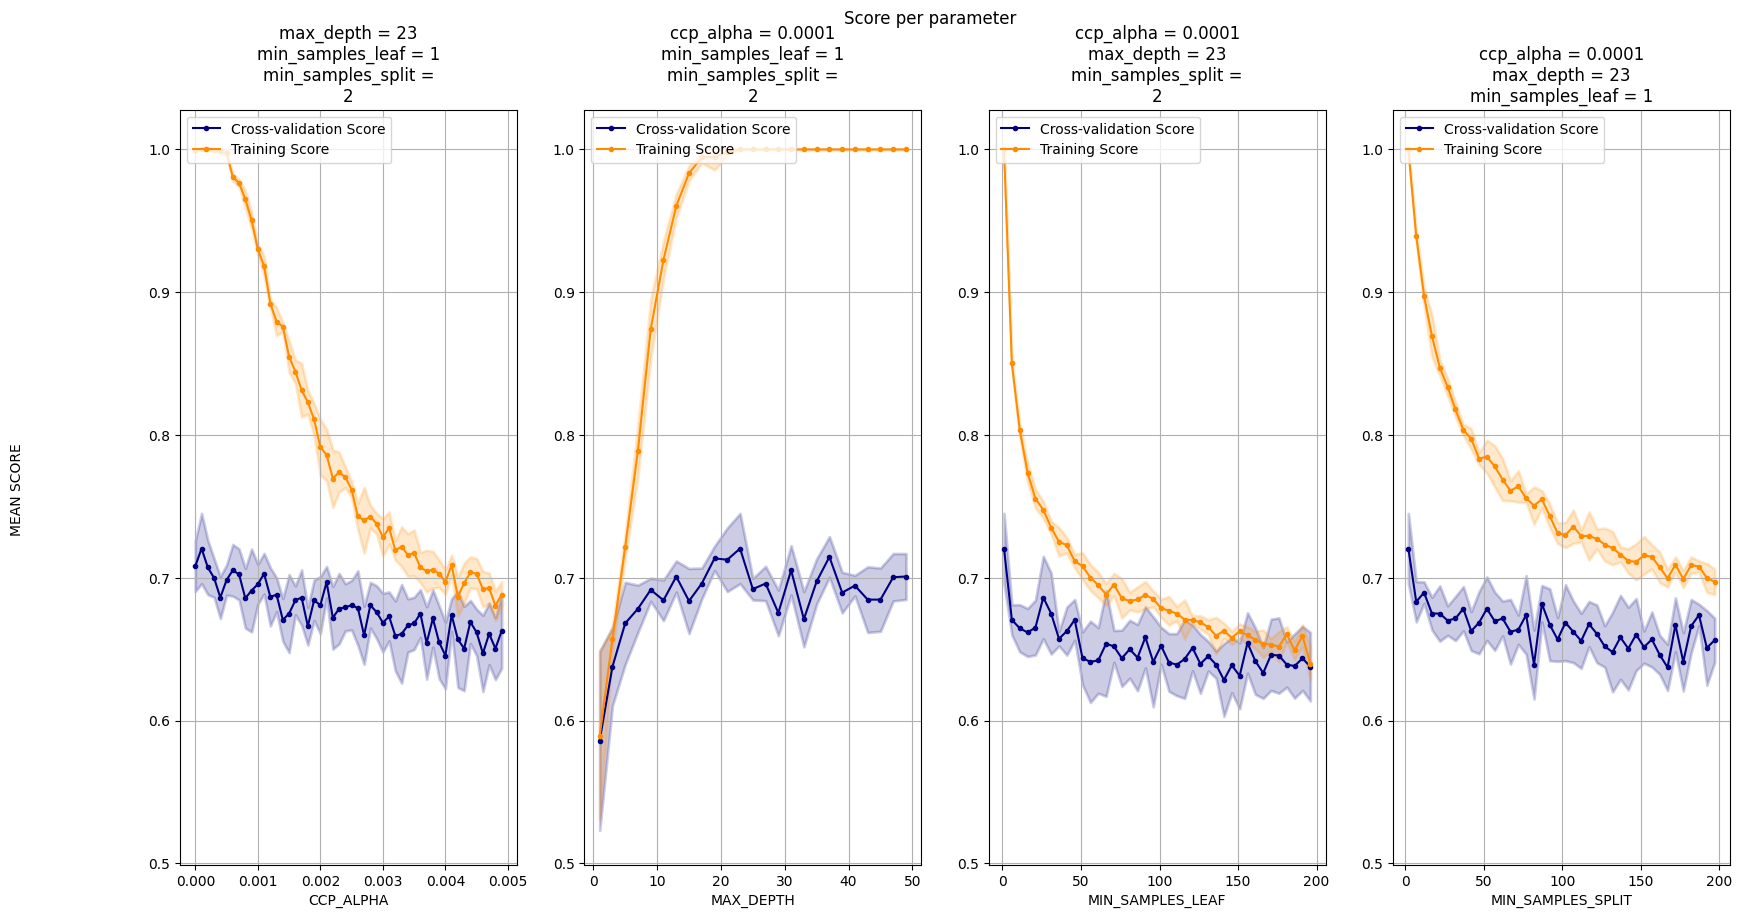

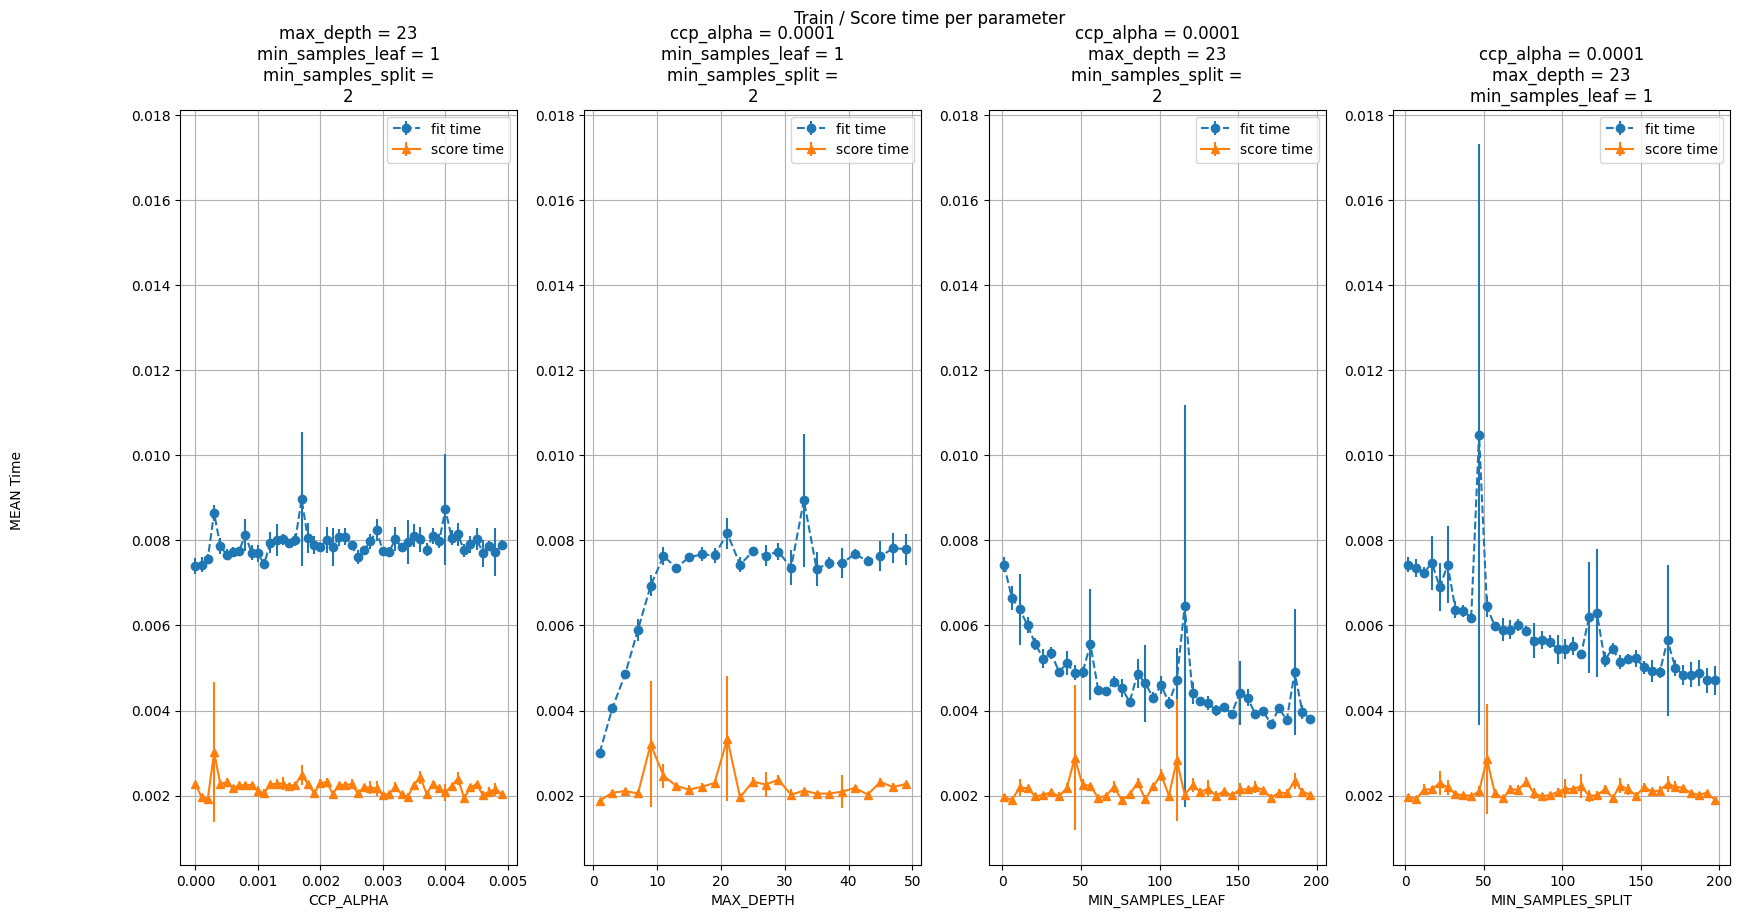

In [9]:
unused_params_values = {'max_depth': 100, 'min_samples_leaf': 31, 'min_samples_split': 36, 'ccp_alpha': 0}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX=PLOT_PREFIX)


common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX=PLOT_PREFIX)


Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_ccp_alpha_4.png


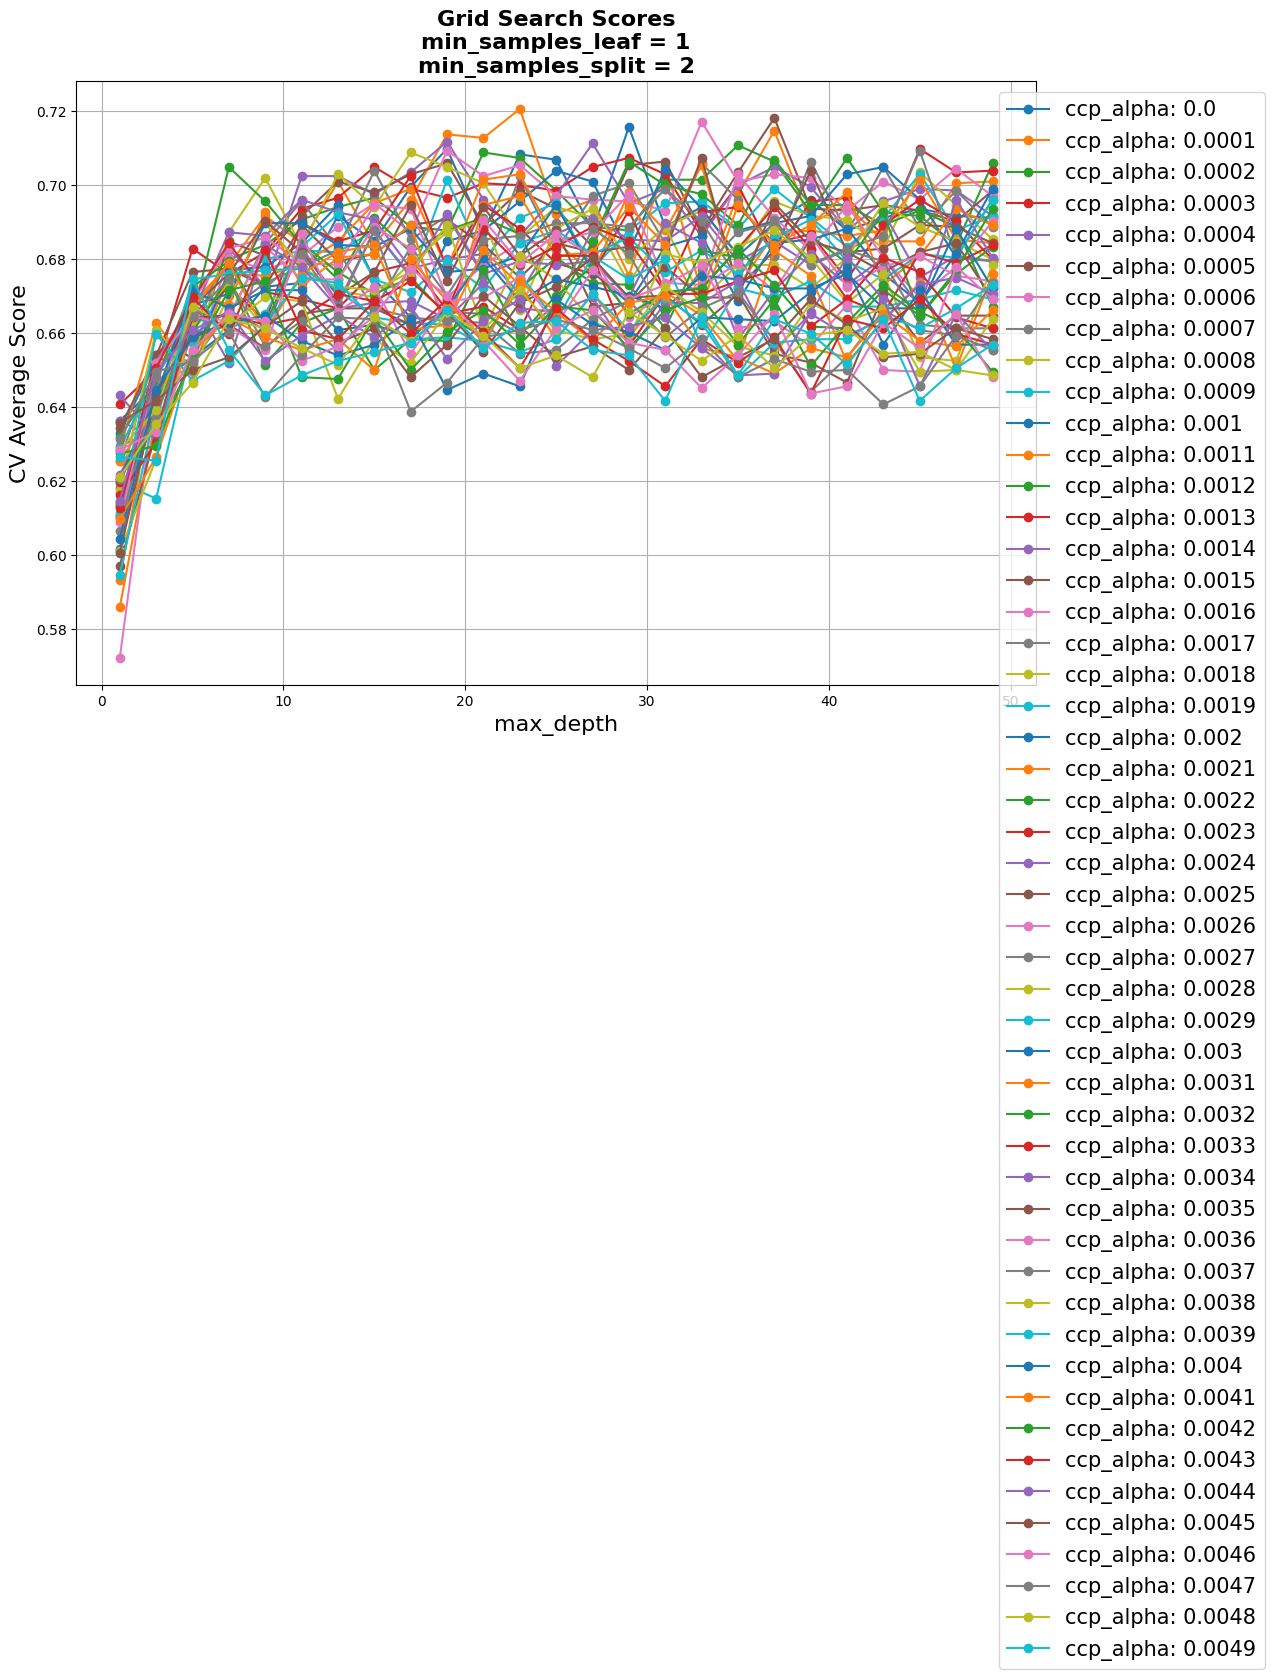

In [10]:
mean_score_limit=0.55
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'max_depth', 'ccp_alpha', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_ccp_alpha_min_samples_leaf_7.png
Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_ccp_alpha_min_samples_split_8.png
Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_min_samples_split_min_samples_leaf_9.png


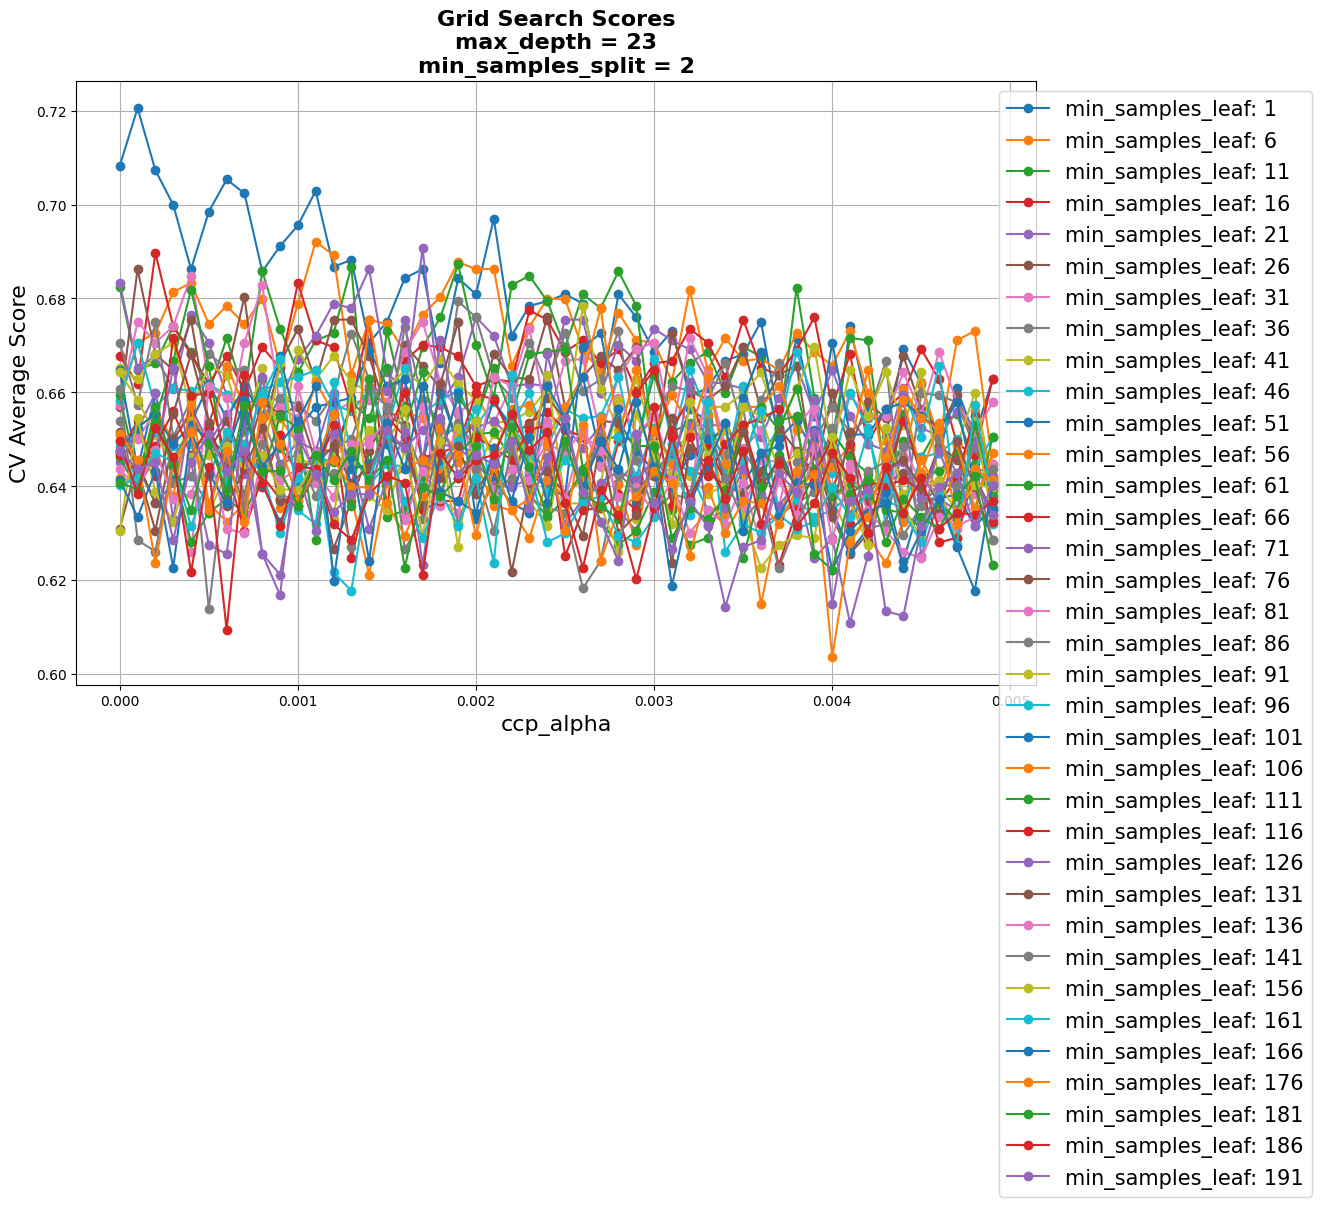

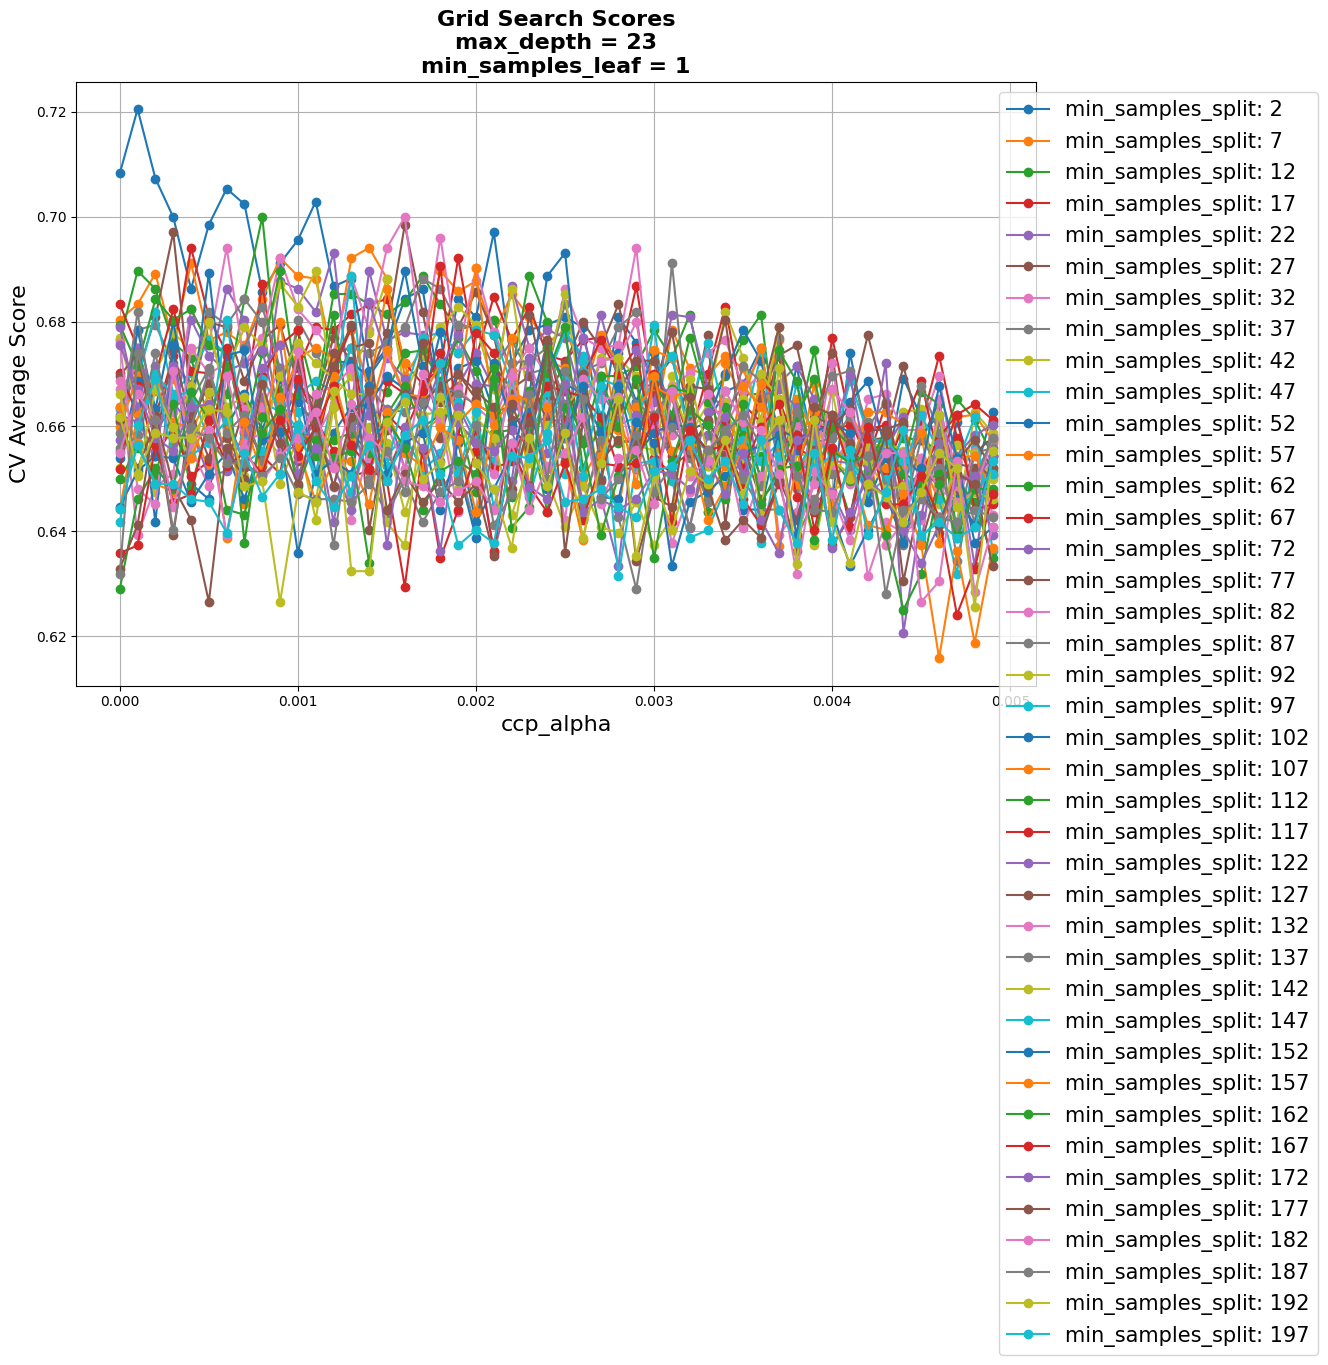

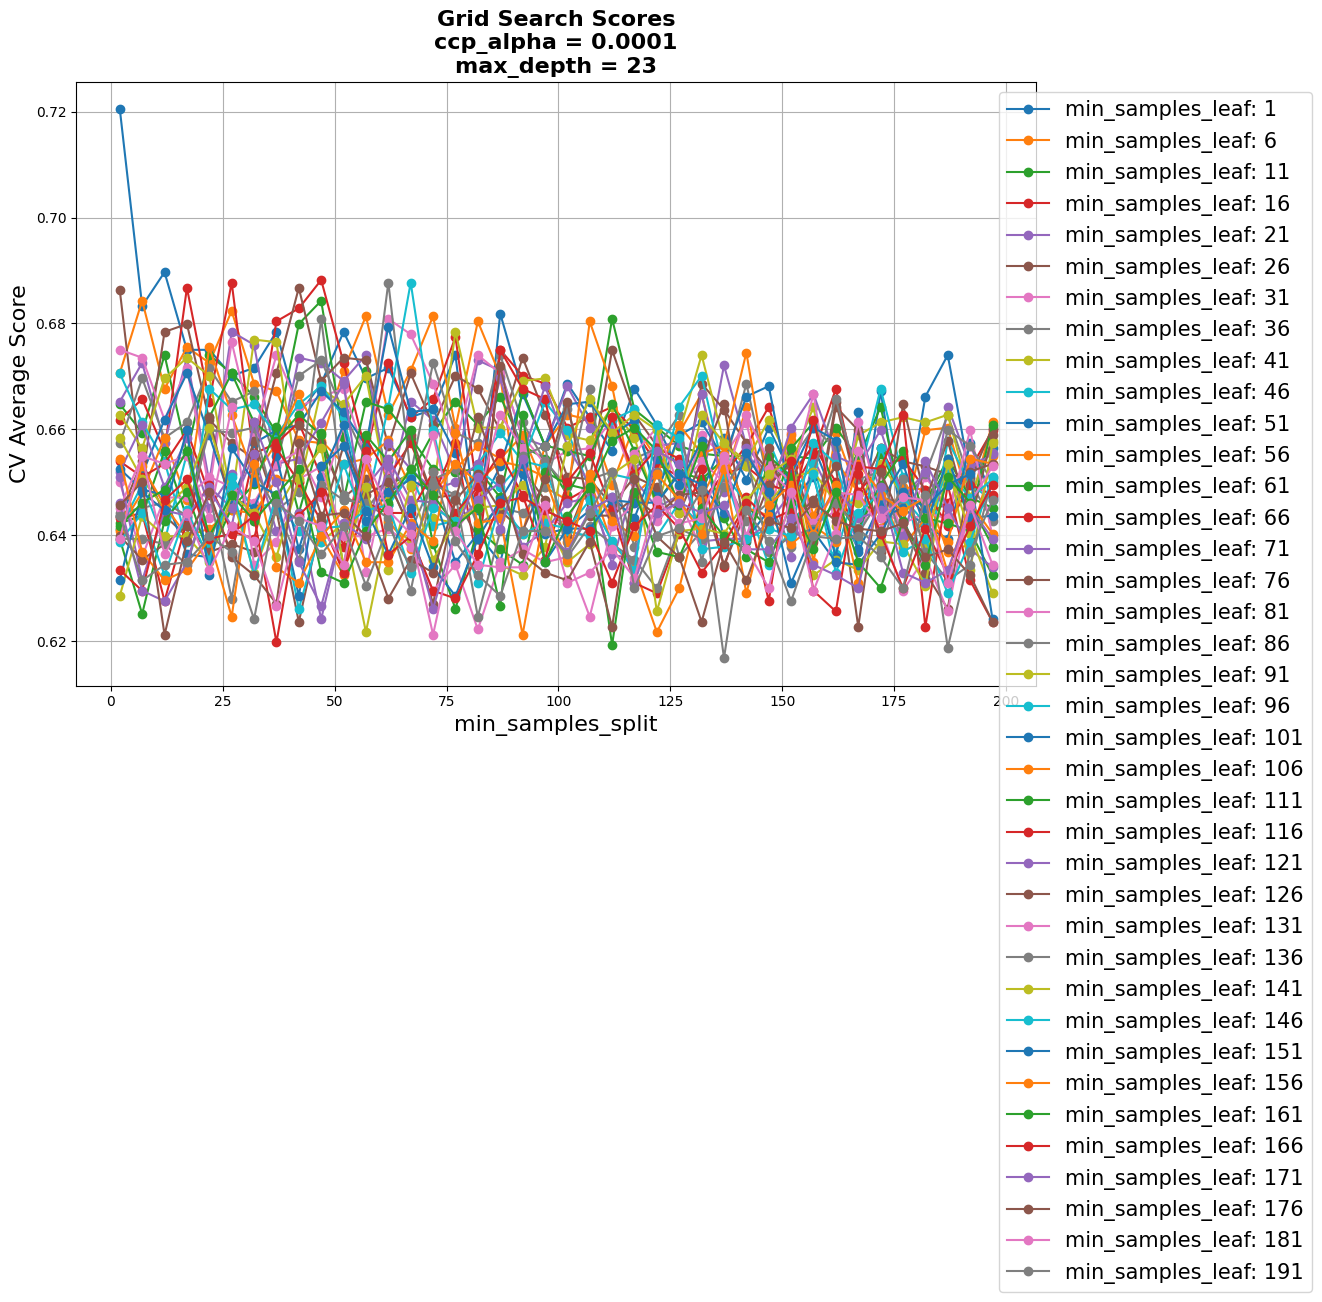

In [12]:
mean_score_limit=0.64
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'min_samples_leaf', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'ccp_alpha', 'min_samples_split', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1
# unused_params_value_dict={'ccp_alpha': 0.0002, 'max_depth': }
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'min_samples_split', 'min_samples_leaf', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)


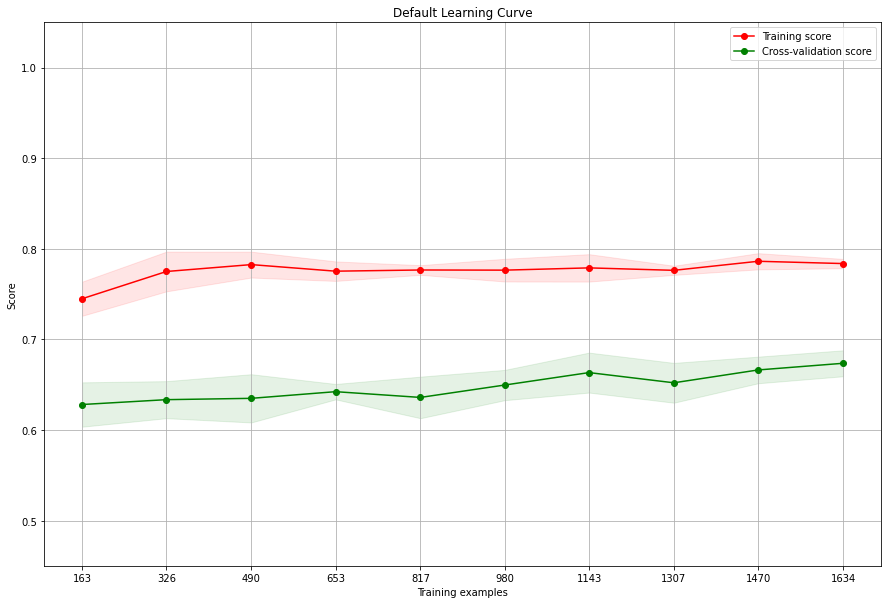

In [27]:
test_parameters = {'criterion': 'entropy', 'max_features': num_features//2, 'max_depth': 11, 'ccp_alpha': 0.0004, 'min_samples_leaf': 6, 'min_samples_split':40}
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "accuracy")
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)


In [14]:
parameters = {'max_depth': max_depth, 'ccp_alpha': ccp_alpha}

gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='balanced_accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/WINE_DECISION_TREE_max_depth_1-99_ccp_alpha_0.0-0.0099.pickle
Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0196s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1476s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:    2.8s
[Parallel(n_jo

Saved  Analysis_Data/WINE_DECISION_TREE_max_depth_1-99_ccp_alpha_0.0-0.0099.pickle


[Parallel(n_jobs=-1)]: Done 25000 out of 25000 | elapsed:  2.5min finished


Plot saved as:  Figures/DECISION_TREE_TEST_GS_ModelComplexity_ccp_alpha_max_depth.png
Plot saved as:  Figures/DECISION_TREE_TEST_GS_Times_ccp_alpha_max_depth.png


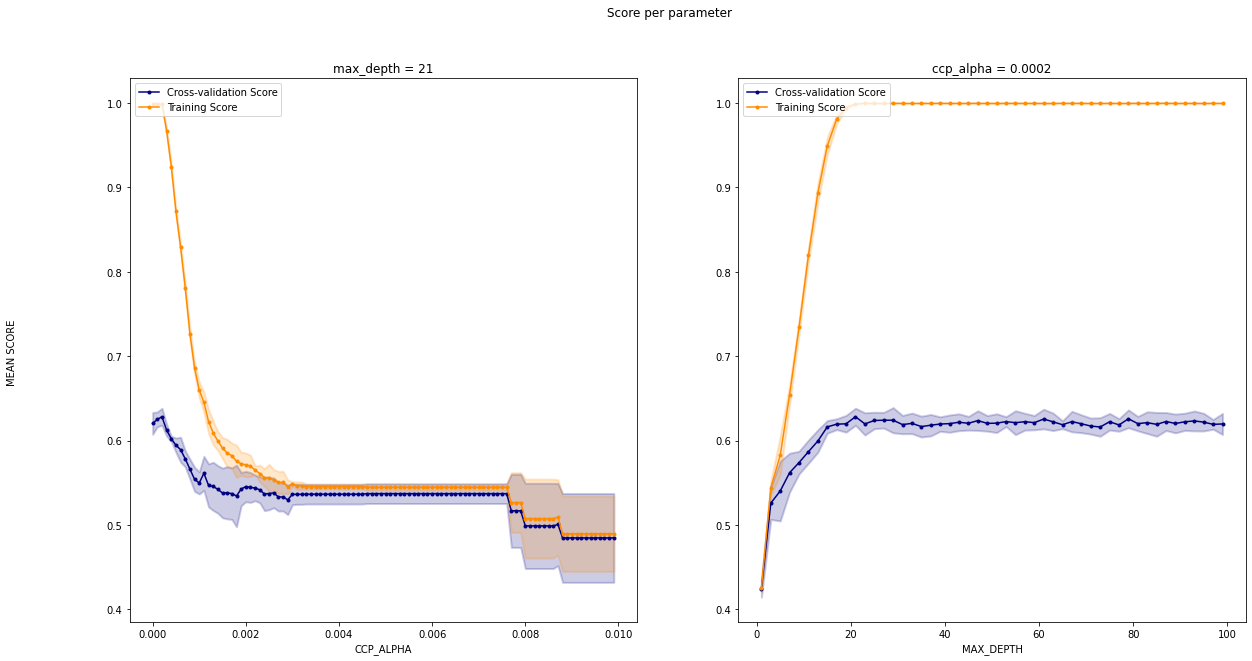

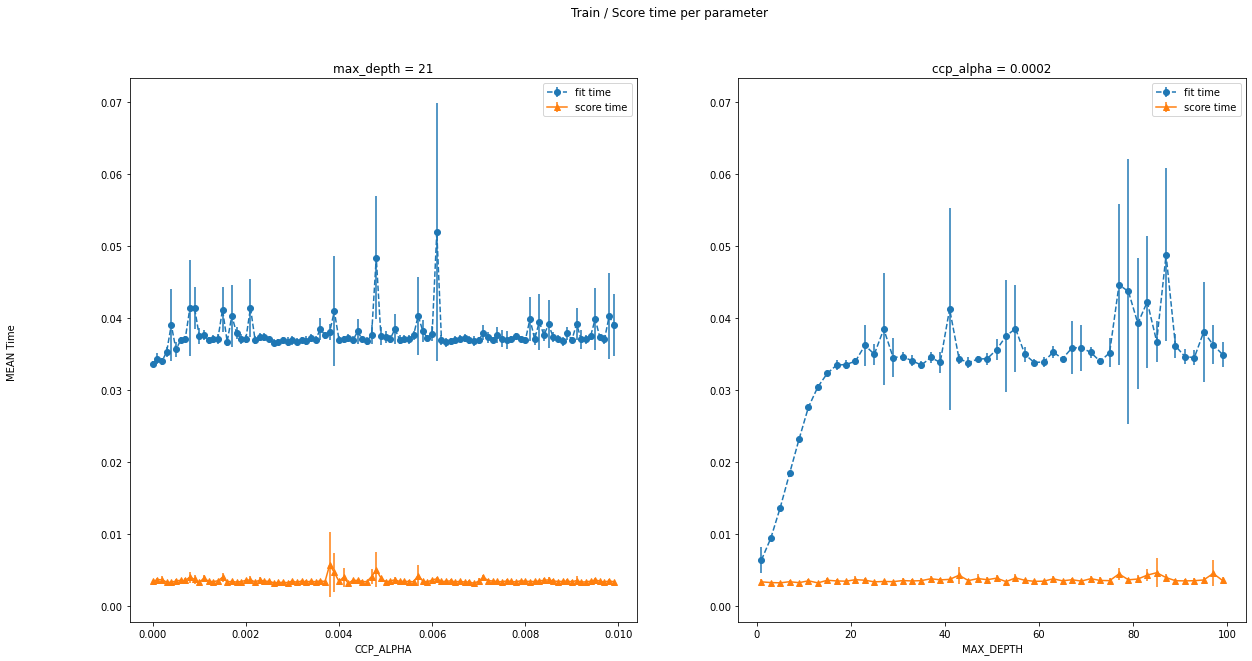

In [15]:
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX=PLOT_PREFIX)
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX=PLOT_PREFIX)

Plot saved as:  Figures/DECISION_TREE_TEST_GridScore_max_depth_ccp_alpha_0.png


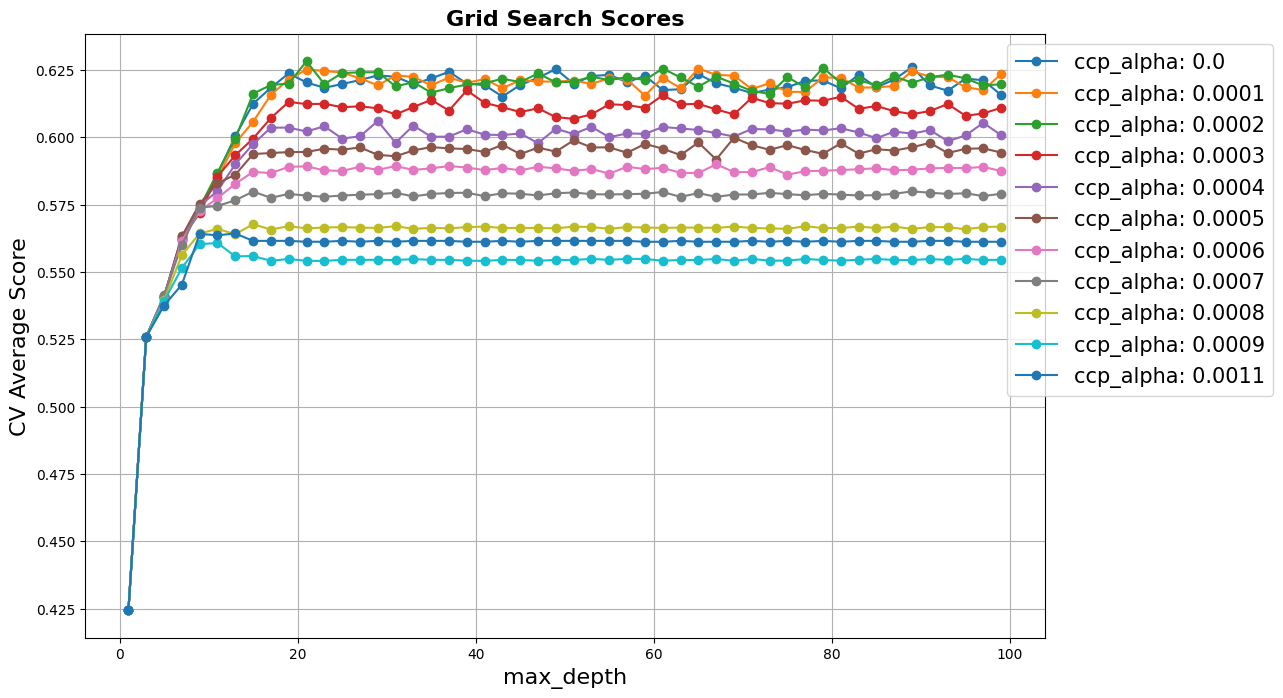

In [16]:
mean_score_limit=0.59
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'max_depth', 'ccp_alpha', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1
